# from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import *

model = load_model(r"F:\pose_recognication\data\Resnet50-notfinetune-98.h5")
print("load successed")

In [2]:
z = zip([x.name for x in model.layers], range(len(model.layers)))
for k, v in z:
    print("{} - {}".format(k,v))

input_1 - 0
conv1_pad - 1
conv1 - 2
bn_conv1 - 3
activation_1 - 4
pool1_pad - 5
max_pooling2d_1 - 6
res2a_branch2a - 7
bn2a_branch2a - 8
activation_2 - 9
res2a_branch2b - 10
bn2a_branch2b - 11
activation_3 - 12
res2a_branch2c - 13
res2a_branch1 - 14
bn2a_branch2c - 15
bn2a_branch1 - 16
add_1 - 17
activation_4 - 18
res2b_branch2a - 19
bn2b_branch2a - 20
activation_5 - 21
res2b_branch2b - 22
bn2b_branch2b - 23
activation_6 - 24
res2b_branch2c - 25
bn2b_branch2c - 26
add_2 - 27
activation_7 - 28
res2c_branch2a - 29
bn2c_branch2a - 30
activation_8 - 31
res2c_branch2b - 32
bn2c_branch2b - 33
activation_9 - 34
res2c_branch2c - 35
bn2c_branch2c - 36
add_3 - 37
activation_10 - 38
res3a_branch2a - 39
bn3a_branch2a - 40
activation_11 - 41
res3a_branch2b - 42
bn3a_branch2b - 43
activation_12 - 44
res3a_branch2c - 45
res3a_branch1 - 46
bn3a_branch2c - 47
bn3a_branch1 - 48
add_4 - 49
activation_13 - 50
res3b_branch2a - 51
bn3b_branch2a - 52
activation_14 - 53
res3b_branch2b - 54
bn3b_branch2b - 55


In [3]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
model_image_size = (224, 224)
fine_tune_layer = 152
final_layer = 177
visual_layer = 174
batch_size = 128
dir = r'F:\pose_recognication\data'
def lambda_func(x):
    x /= 255.
    x -= 0.5
    x *= 2
    return x

In [6]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def show_heatmap_image(model_show, weights_show):
    test_dir = os.path.join(dir,  "test", "test" )
    image_files = glob.glob(os.path.join(test_dir,"*"))
    print(len(image_files))
    
    plt.figure(figsize=(12, 24))
    for i in range(20):
        plt.subplot(5, 4, i+1)
        img = cv2.imread(image_files[i])
        img = cv2.resize(img,  (model_image_size[1],model_image_size[0]))
        x = img.copy()
        x.astype(np.float32)
        out, predictions = model_show.predict(np.expand_dims(x, axis=0))
        predictions = predictions[0]
        out = out[0]
        
        max_idx = np.argmax(predictions)
        prediction = predictions[max_idx]

        status = ["pa",  " 仰头",  "diantou",  "shuohua",  "work",  
                  "left", "right", "write", "chenck audio", "fue"]

        plt.title('c%d |%s| %.2f%%' % (max_idx , status[max_idx], prediction*100))
    
        cam = (prediction - 0.5) * np.matmul(out, weights_show)
        cam = cam[:,:,max_idx]
        cam -= cam.min()
        cam /= cam.max()
        cam -= 0.2
        cam /= 0.8

        cam = cv2.resize(cam, (model_image_size[1],model_image_size[0]))
        heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap[np.where(cam <= 0.2)] = 0

        out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

        plt.axis('off')
        plt.imshow(out[:,:,::-1])
print("done")





done


layer_output Tensor("activation_49/Relu:0", shape=(?, 7, 7, 2048), dtype=float32)
weights shape (2048, 10)
20


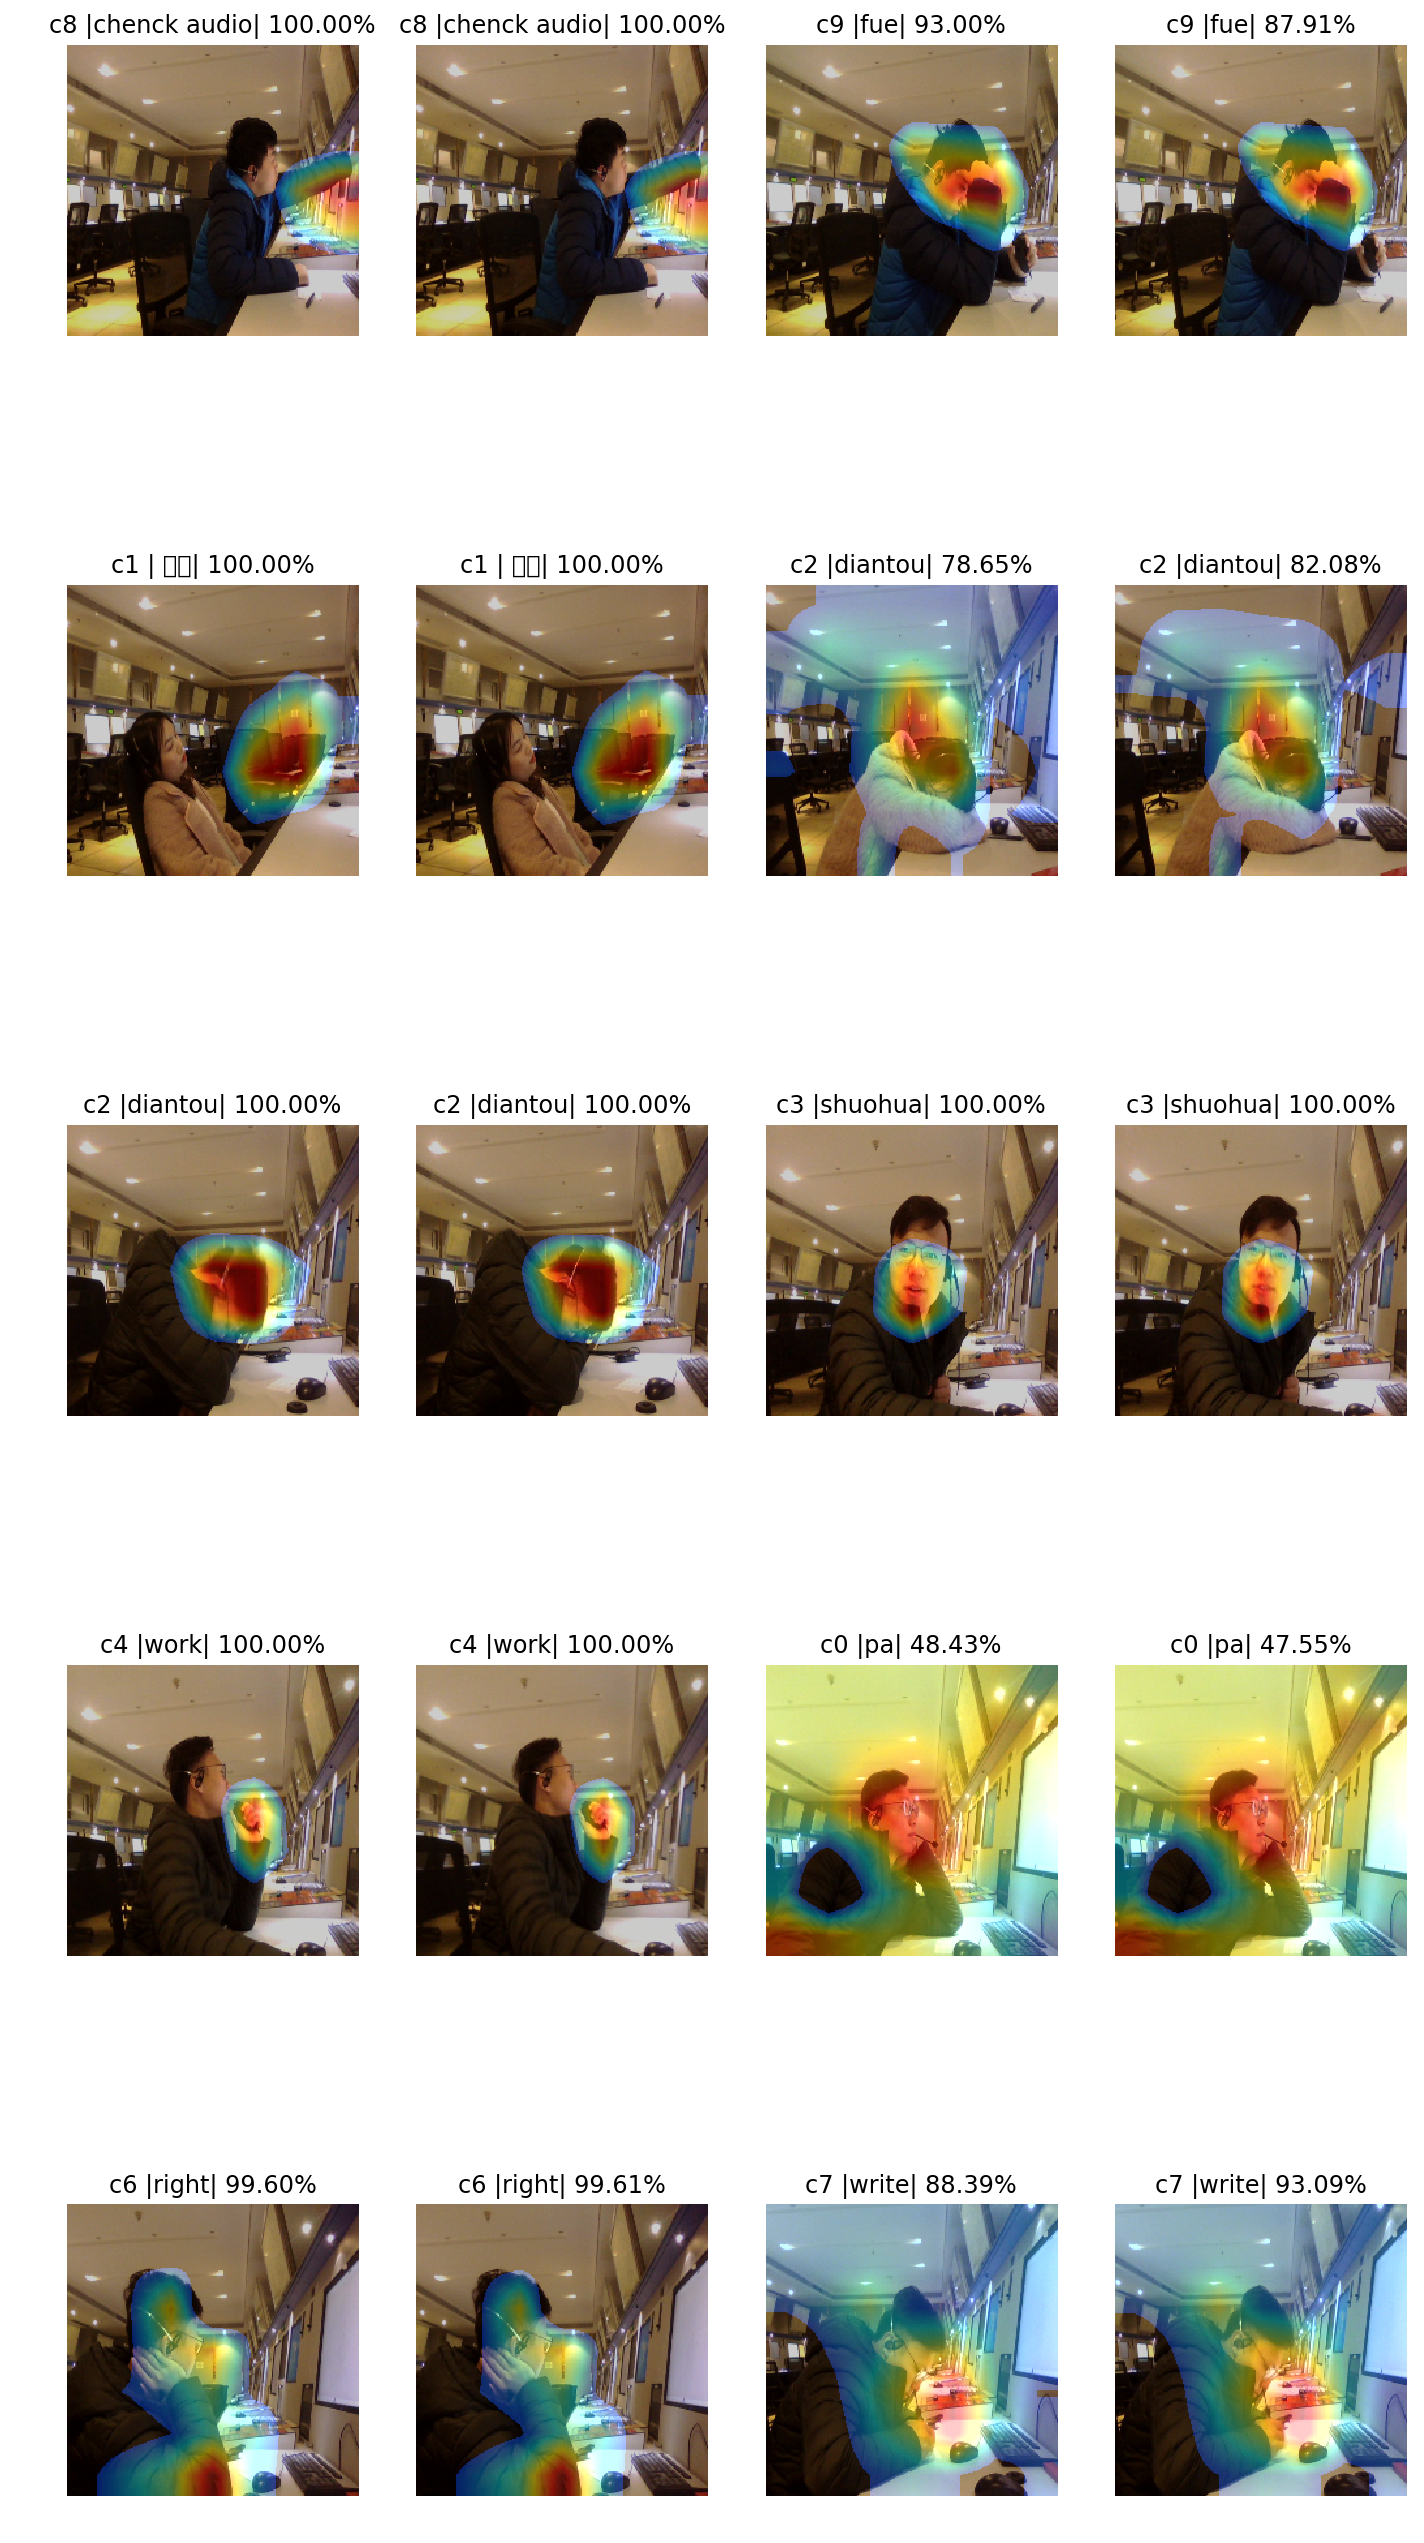

In [7]:
from keras.models import Model


weights = model.layers[final_layer].get_weights()[0]
layer_output = model.layers[visual_layer].output
model2 = Model(model.input, [layer_output, model.output])
print("layer_output {0}".format(layer_output))
print("weights shape {0}".format(weights.shape))
show_heatmap_image(model2, weights)